In [11]:

!pip install matplotlib
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install pandas
!pip install reader
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


(114272, 4)


"ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))\nax.set_ylabel('{} axis'.format(axes_str[axes[1]]))\nif len(axes) > 2:\n    ax.set_xlim3d(*axes_limits[axes[0]])\n    ax.set_ylim3d(*axes_limits[axes[1]])\n    ax.set_zlim3d(*axes_limits[axes[2]])\n    ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))\nelse:\n    ax.set_xlim(*axes_limits[axes[0]])\n    ax.set_ylim(*axes_limits[axes[1]])"

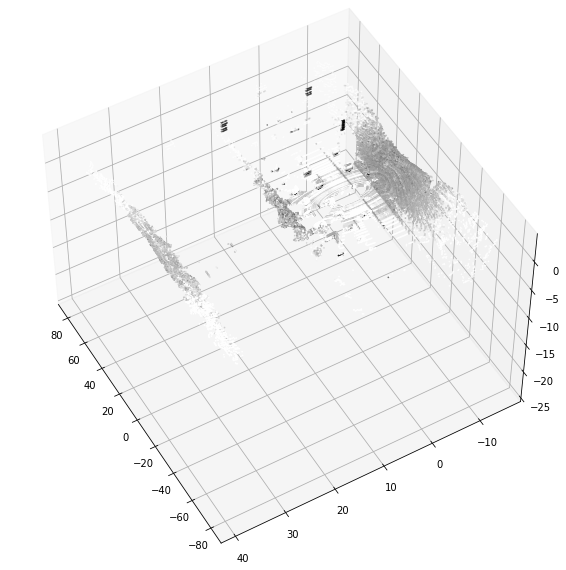

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
#X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
#y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)
file_data_path = np.fromfile("/home/mcw/Documents/Kitti/training/velodyne/002044.bin",
                             dtype='float32')
data=np.reshape(file_data_path,((file_data_path.shape[0]//4),4))
print(data.shape)
xyz=data[:,:4]
axes=[0, 1, 2]
fig = plt.figure(figsize=(20,10)) 
ax=fig.add_subplot(111,projection='3d')
ax.view_init(50,150) 

ax.scatter(*np.transpose(xyz[:, axes]), s=0.5, c=xyz[:, 3], cmap='gray_r')

#ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],c='red')
'''ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
if len(axes) > 2:
    ax.set_xlim3d(*axes_limits[axes[0]])
    ax.set_ylim3d(*axes_limits[axes[1]])
    ax.set_zlim3d(*axes_limits[axes[2]])
    ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
else:
    ax.set_xlim(*axes_limits[axes[0]])
    ax.set_ylim(*axes_limits[axes[1]])'''

In [2]:
!pip install pykitti
!pip install opencv-python
!pip install source

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pyyaml
!pip install 
!pip install pykitti
!pip install Kitti_util

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: You must give at least one requirement to install (see "pip help install")
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement Kitti_util
ERROR: No matching distribution found for Kitti_util


(119977, 4)


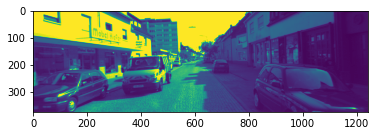

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(800, 800, 3)


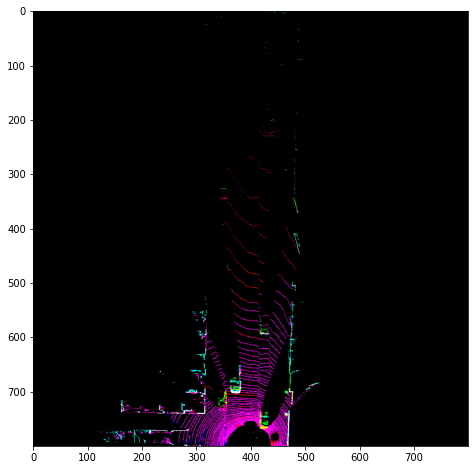

In [6]:
from __future__ import print_function
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import yaml
import pandas as pd
#from kitti_util import *
from pylab import *
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN
from PIL import Image
from sklearn.preprocessing import StandardScaler
#file_data_path = np.fromfile("/home/mcw/Documents/Kitti/training/velodyne/002043.bin",dtype='float32')

def point_cloud_2_top(points,
                      res=0.1,
                      zres=0.3,
                      side_range=(-20., 20-0.05),  # left-most to right-most
                      fwd_range=(0., 40.-0.05),  # back-most to forward-most
                      height_range=(-2, 0.),  # bottom-most to upper-most
                      ):

    # EXTRACT THE POINTS FOR EACH AXIS
    x_points = points[:, 0]
    y_points = points[:, 1]
    z_points = points[:, 2]
    reflectance = points[:,3]
 
    # INITIALIZE EMPTY ARRAY - of the dimensions we want
    x_max = int((side_range[1] - side_range[0]) / res)
    y_max = int((fwd_range[1] - fwd_range[0]) / res)
    z_max = int((height_range[1] - height_range[0]) / zres)
    top = np.zeros([y_max+1, x_max+1, z_max+1], dtype=np.float32)
 
    # FILTER - To return only indices of points within desired cube
    # Three filters for: Front-to-back, side-to-side, and height ranges
    # Note left side is positive y axis in LIDAR coordinates
    f_filt = np.logical_and(
        (x_points > fwd_range[0]), (x_points < fwd_range[1]))
    s_filt = np.logical_and(
        (y_points > -side_range[1]), (y_points < -side_range[0]))
    filt = np.logical_and(f_filt, s_filt)
 
    for i, height in enumerate(np.arange(height_range[0], height_range[1], zres)):
 
        z_filt = np.logical_and((z_points >= height),
                                (z_points < height + zres))
        zfilter = np.logical_and(filt, z_filt)
        indices = np.argwhere(zfilter).flatten()
 
        # KEEPERS
        xi_points = x_points[indices]
        yi_points = y_points[indices]
        zi_points = z_points[indices]
        ref_i = reflectance[indices]
 
        # CONVERT TO PIXEL POSITION VALUES - Based on resolution
        x_img = (-yi_points / res).astype(np.int32)  # x axis is -y in LIDAR
        y_img = (-xi_points / res).astype(np.int32)  # y axis is -x in LIDAR
 
        # SHIFT PIXELS TO HAVE MINIMUM BE (0,0)
        # floor & ceil used to prevent anything being rounded to below 0 after
        # shift
        x_img -= int(np.floor(side_range[0] / res))
        y_img += int(np.floor(fwd_range[1] / res))
 
        # CLIP HEIGHT VALUES - to between min and max heights
        pixel_values = zi_points - height_range[0]
        # pixel_values = zi_points
 
        # FILL PIXEL VALUES IN IMAGE ARRAY
        top[y_img, x_img, i] = pixel_values
 
        # max_intensity = np.max(prs[idx])
        top[y_img, x_img, z_max] = ref_i
        
    top = (top / np.max(top) * 255).astype(np.uint8)
    return top

path = 'R:/2011_09_26/2011_09_26_drive_0048_sync/velodyne_points/data/0000000000.bin'
img_path = 'R:/2011_09_26/2011_09_26_drive_0048_sync/image_00/data/0000000000.png'
points = np.fromfile(path, dtype=np.float32).reshape(-1, 4)
print(points.shape)

img = Image.open(img_path)
plt.imshow(img); 
plt.show()


def draw_point_cloud(ax, points, axes=[0, 1, 2], point_size=0.1, xlim3d=None, ylim3d=None, zlim3d=None):
    """
    Convenient method for drawing various point cloud projections as a part of frame statistics.
    """
    axes_limits = [
        [-20, 80], # X axis range
        [-40, 40], # Y axis range
        [-3, 3]   # Z axis range
    ]
    axes_str = ['X', 'Y', 'Z']
    ax.grid(False)
    ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
    ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
    ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
    #if len(axes) > 2:
    ax.set_xlim3d(*axes_limits[axes[0]])
    ax.set_ylim3d(*axes_limits[axes[1]])
    ax.set_zlim3d(*axes_limits[axes[2]])
    ax.set_xlim3d(xlim3d)

#df = read_detection('/home/mcw/Documents/Kitti/training/label_2/002044.txt')
#df.head() 
#print(len(df))
 
fig, ax = plt.subplots(figsize=(8, 8))

#print(fig,ax)
#fig = plt.figure(figsize=(10,10)) 
#ax=fig.add_subplot(projection='3d')
#ax.view_init(45,150) 



top = point_cloud_2_top(points, zres=1.0, side_range=(-40., 40-0.05), fwd_range=(0., 80.-0.05))
#print(top)
top = np.array(top, dtype = np.float32)     #reshape(-1,4)
print (top.shape)
ax.imshow(top, vmin=0, vmax=255)



In [43]:
X = StandardScaler().fit_transform(top)
print(X)

[[-0.0781185  -0.07819211 -0.07803176 -0.07775078]
 [-0.0781185  -0.07819211 -0.07803176 -0.07775078]
 [-0.0781185  -0.07819211 -0.07803176 -0.07775078]
 ...
 [-0.0781185  -0.07819211 -0.07803176 -0.07775078]
 [-0.0781185  -0.07819211 -0.07803176 -0.07775078]
 [-0.0781185  -0.07819211 -0.07803176 -0.07775078]]


(119977, 4)
(60084,)
-193 -54 0 -54


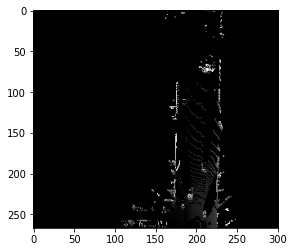

In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

path = 'R:/2011_09_26/2011_09_26_drive_0048_sync/velodyne_points/data/0000000000.bin'
pointcloud = np.fromfile(str(path), dtype=np.float32, count=-1).reshape([-1, 4])
 # Set the bird's eye view range
print(pointcloud.shape)
side_range = (-30, 60) # left and right distance
fwd_range = (0,8.0) #  
 
x_points = pointcloud[:, 0]
y_points = pointcloud[:, 1]
z_points = pointcloud[:, 2]
 
 #Get the point in the area
f_filt = np.logical_and(x_points > fwd_range[0], x_points < fwd_range[1])
s_filt = np.logical_and(z_points > side_range[0], z_points < side_range[1])
filter = np.logical_and(f_filt, s_filt)
indices = np.argwhere(filter).flatten()
print(indices.shape)
x_points = x_points[indices]
y_points = y_points[indices]
z_points = z_points[indices]
 
res = 0.3 # resolution 0.05m
x_img = (-y_points / res).astype(np.int32)
y_img = (-x_points / res).astype(np.int32)
 # Adjust the origin of the coordinates
x_img += int(np.floor(side_range[0]) / res)
y_img += int(np.floor(fwd_range[1]) / res)
print(x_img.min(), x_img.max(), y_img.min(), x_img.max())
 
 # Fill in pixel values
height_range = (-2, 0.5)
pixel_value = np.clip(a=z_points, a_max=height_range[1], a_min=height_range[0])
 
def scale_to_255(a, min, max, dtype=np.uint8):
	return ((a - min) / float(max - min) * 255).astype(dtype)
 
pixel_value = scale_to_255(pixel_value, height_range[0], height_range[1])
 #Create an image array
x_max = 1 + int((side_range[1] - side_range[0]) / res)
y_max = 1 + int((fwd_range[1] - fwd_range[0]) / res)
im = np.zeros([y_max, x_max], dtype=np.uint8)
im[y_img, x_img] = pixel_value
#imshow (Grayscale)
#im2 = Image.fromarray(im)
#im2.show()
plt.imshow(im, cmap="gray")
#plt.show()


In [39]:
import pandas as pd

f = open('/home/mcw/Documents/Kitti/training/label_2/001368.txt', "r")
print(f.read())

Columns_name = ['type','truncated','occluded','alpha','bbox_lift','bbox_top','bbox_right','bbox_bottom','height','width','length','pos_x','pos_y','pos_z','rot_y']
df = pd.read_csv('/home/mcw/Documents/Kitti/training/label_2/001368.txt',header = None,sep = ' ')
print(len(df))
df.columns = Columns_name

df.head(3)

Car 0.00 0 -1.58 562.96 180.18 620.93 227.38 1.36 1.69 3.38 -0.64 1.61 22.86 -1.61
Car 0.08 0 -1.29 180.66 192.99 458.56 374.00 1.46 1.59 3.65 -2.72 1.71 7.53 -1.62
Car 0.00 2 -1.34 358.11 191.62 500.60 290.53 1.40 1.60 3.35 -2.98 1.75 12.36 -1.57
Car 0.00 2 1.09 221.49 189.92 380.70 269.80 1.37 1.52 3.30 -6.19 1.72 14.24 0.68
Car 0.00 2 0.96 362.96 182.10 464.78 226.01 1.40 1.52 3.76 -6.89 1.74 25.05 0.69
Car 0.00 0 -1.46 523.28 179.17 562.81 207.58 1.30 1.55 3.51 -3.26 1.62 35.29 -1.56
Car 0.00 2 0.79 460.98 175.44 526.97 201.21 1.57 1.67 4.20 -7.45 1.77 46.03 0.63
Car 0.99 3 -2.27 899.15 229.55 1241.00 374.00 1.32 1.70 4.04 2.61 1.67 2.60 -1.54
Car 0.00 0 -1.89 747.44 180.54 976.11 344.40 1.56 1.48 3.36 2.70 1.66 8.62 -1.59
Car 0.00 0 -1.69 640.04 179.11 694.15 219.57 1.38 1.55 3.60 2.01 1.62 26.71 -1.61
Truck 0.00 3 -1.66 627.61 133.33 692.18 207.87 3.41 2.57 7.87 2.38 1.64 37.16 -1.59
Pedestrian 0.00 0 2.69 716.69 168.52 729.69 209.94 1.78 0.78 0.65 4.85 1.60 31.46 2.85
Car 0.00 1

,type,truncated,occluded,alpha,bbox_lift,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
0,Car,0.00,0,-1.58,562.96,180.18,620.93,227.38,1.36,1.69,3.38,-0.64,1.61,22.86,-1.61
1,Car,0.08,0,-1.29,180.66,192.99,458.56,374.00,1.46,1.59,3.65,-2.72,1.71,7.53,-1.62
2,Car,0.00,2,-1.34,358.11,191.62,500.60,290.53,1.40,1.60,3.35,-2.98,1.75,12.36,-1.57


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Length mismatch: Expected axis has 13 elements, new values have 15 elements

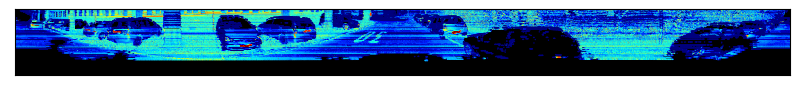

In [13]:
img_id=200
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import yaml
import pandas as pd
#from li import *
from pylab import *
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
    

'''def point_cloud_2_top(points,
                      res=0.1,
                      zres=0.3,
                      side_range=(-20., 20-0.05),  # left-most to right-most
                      fwd_range=(0., 40.-0.05),  # back-most to forward-most
                      height_range=(-2., 0.),  # bottom-most to upper-most
                      ):
    """ Creates an birds eye view representation of the point cloud data for MV3D.
    Args:
        points:     (numpy array)
                    N rows of points data
                    Each point should be specified by at least 3 elements x,y,z
        res:        (float)
                    Desired resolution in metres to use. Each output pixel will
                    represent an square region res x res in size.
        zres:        (float)
                    Desired resolution on Z-axis in metres to use.
        side_range: (tuple of two floats)
                    (-left, right) in metres
                    left and right limits of rectangle to look at.
        fwd_range:  (tuple of two floats)
                    (-behind, front) in metres
                    back and front limits of rectangle to look at.
        height_range: (tuple of two floats)
                    (min, max) heights (in metres) relative to the origin.
                    All height values will be clipped to this min and max value,
                    such that anything below min will be truncated to min, and
                    the same for values above max.
    Returns:
        numpy array encoding height features , density and intensity.
    """
    # EXTRACT THE POINTS FOR EACH AXIS
    x_points = points[:, 0]
    y_points = points[:, 1]
    z_points = points[:, 2]
    reflectance = points[:,3]
 
    # INITIALIZE EMPTY ARRAY - of the dimensions we want
    x_max = int((side_range[1] - side_range[0]) / res)
    y_max = int((fwd_range[1] - fwd_range[0]) / res)
    z_max = int((height_range[1] - height_range[0]) / zres)
    top = np.zeros([y_max+1, x_max+1, z_max+1], dtype=np.float32)
 
    # FILTER - To return only indices of points within desired cube
    # Three filters for: Front-to-back, side-to-side, and height ranges
    # Note left side is positive y axis in LIDAR coordinates
    f_filt = np.logical_and(
        (x_points > fwd_range[0]), (x_points < fwd_range[1]))
    s_filt = np.logical_and(
        (y_points > -side_range[1]), (y_points < -side_range[0]))
    filt = np.logical_and(f_filt, s_filt)
 
    for i, height in enumerate(np.arange(height_range[0], height_range[1], zres)):
 
        z_filt = np.logical_and((z_points >= height),
                                (z_points < height + zres))
        zfilter = np.logical_and(filt, z_filt)
        indices = np.argwhere(zfilter).flatten()
 
        # KEEPERS
        xi_points = x_points[indices]
        yi_points = y_points[indices]
        zi_points = z_points[indices]
        ref_i = reflectance[indices]
 
        # CONVERT TO PIXEL POSITION VALUES - Based on resolution
        x_img = (-yi_points / res).astype(np.int32)  # x axis is -y in LIDAR
        y_img = (-xi_points / res).astype(np.int32)  # y axis is -x in LIDAR
 
        # SHIFT PIXELS TO HAVE MINIMUM BE (0,0)
        # floor & ceil used to prevent anything being rounded to below 0 after
        # shift
        x_img -= int(np.floor(side_range[0] / res))
        y_img += int(np.floor(fwd_range[1] / res))
 
        # CLIP HEIGHT VALUES - to between min and max heights
        pixel_values = zi_points - height_range[0]
        # pixel_values = zi_points
 
        # FILL PIXEL VALUES IN IMAGE ARRAY
        top[y_img, x_img, i] = pixel_values
 
        # max_intensity = np.max(prs[idx])
        top[y_img, x_img, z_max] = ref_i
        
    top = (top / np.max(top) * 255).astype(np.uint8)
    return top '''
 
def transform_to_img(xmin, xmax, ymin, ymax,
                      res=0.1,
                      side_range=(-20., 20-0.05),  # left-most to right-most
                      fwd_range=(0., 40.-0.05),  # back-most to forward-most
                      ):
 
    xmin_img = -ymax/res - side_range[0]/res
    xmax_img = -ymin/res - side_range[0]/res
    ymin_img = -xmax/res + fwd_range[1]/res
    ymax_img = -xmin/res + fwd_range[1]/res
    
    return xmin_img, xmax_img, ymin_img, ymax_img
       

    
def compute_3d_box_cam2(h, w, l, x, y, z, yaw):
    R = np.array([[np.cos(yaw), 0, np.sin(yaw)], [0, 1, 0], [-np.sin(yaw), 0, np.cos(yaw)]])
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h]
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners,y_corners,z_corners]))
    corners_3d_cam2 += np.vstack([x, y, z])
    return corners_3d_cam2


def Differ_color(df):
    val=list(df['type'])
    for o in range(len(df)):
            corners_3d_cam2 = compute_3d_box_cam2(*df.loc[o, ['height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']])
            corners_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T)
            x1,x2,x3,x4 = corners_3d_velo[0:4,0]
            y1,y2,y3,y4 = corners_3d_velo[0:4,1]

            xmax = np.max(corners_3d_velo[:, 0])
            xmin = np.min(corners_3d_velo[:, 0])
            ymax = np.max(corners_3d_velo[:, 1])
            ymin = np.min(corners_3d_velo[:, 1])

            x1, x2, y1, y2 = transform_to_img(x1, x2, y1, y2, side_range=(-40., 40-0.05), fwd_range=(0., 80.-0.05))
            x3, x4, y3, y4 = transform_to_img(x3, x4, y3, y4, side_range=(-40., 40-0.05), fwd_range=(0., 80.-0.05))
            ps=[]
            polygon = np.zeros([5,2], dtype = np.float32)
            polygon[0,0] = x1 
            polygon[1,0] = x2      
            polygon[2,0] = x3 
            polygon[3,0] = x4 
            polygon[4,0] = x1

            polygon[0,1] = y1 
            polygon[1,1] = y2      
            polygon[2,1] = y3 
            polygon[3,1] = y4
            polygon[4,1] = y1    


            line1 = [(x1,y1), (x2,y2)]
            line2 = [(x2,y2), (x3,y3)]
            line3 = [(x3,y3), (x4,y4)]
            line4 = [(x4,y4), (x1,y1)]
            (line1_xs, line1_ys) = zip(*line1)
            (line2_xs, line2_ys) = zip(*line2)
            (line3_xs, line3_ys) = zip(*line3)
            (line4_xs, line4_ys) = zip(*line4)
            
            dict1={'Car':'Blue','Truck':'Red','Pedestrian':'Yellow','Tram':'Orange','Van':'White','Cyclist':'Aqua','Person':'White','Misc':'Magenta'}
            ax.add_line(Line2D(line1_xs, line1_ys, linewidth=2, color=dict1[val[0]]))
            ax.add_line(Line2D(line2_xs, line2_ys, linewidth=2, color=dict1[val[0]]))
            ax.add_line(Line2D(line3_xs, line3_ys, linewidth=2, color=dict1[val[0]]))
            ax.add_line(Line2D(line4_xs, line4_ys, linewidth=2, color=dict1[val[0]]))
        
           
                                                
def read_detection(path):
    df=pd.read_csv(path, header=None, sep=' ')
    #print(df)

    
    df.columns= ['type', 'truncated', 'occluded', 'alpha', 'bbox_left', 'bbox_top',
                'bbox_right', 'bbox_bottom', 'height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']
    
    df_P,df_C,df_TR,df_Tram,df_CY,df_V,df_S_P,df_Misc=df,df,df,df,df,df,df,df
    df_P.columns,df_C.columns,df_TR.columns,df_Tram.columns,df_CY.columns,df_V.columns,df_S_P.columns,df_Misc.columns=df.columns,df.columns,df.columns,df.columns,df.columns,df.columns,df.columns,df.columns
    

    df_P= df[df['type']=='Pedestrian']
    df_P.reset_index(drop=True, inplace=True)
    Differ_color(df_P)
    
    df_C= df[df['type']=='Car']
    df_C.reset_index(drop=True, inplace=True)
    Differ_color(df_C)
    
    df_TR= df[df['type']=='Truck']
    df_TR.reset_index(drop=True, inplace=True)
    Differ_color(df_TR)
    
    df_CY= df[df['type']=='Cyclist']
    df_CY.reset_index(drop=True, inplace=True)
    Differ_color(df_CY)
    
    df_Tram= df[df['type']=='Tram']
    df_Tram.reset_index(drop=True, inplace=True)
    Differ_color(df_Tram)
    
    df_V= df[df['type']=='Van']
    df_V.reset_index(drop=True, inplace=True)
    Differ_color(df_V)
    
    df_S_P= df[df['type']=='Person']
    df_S_P.reset_index(drop=True, inplace=True)
    Differ_color(df_S_P)
    
    df_Misc= df[df['type']=='Misc']
    df_Misc.reset_index(drop=True, inplace=True)
    #df_Misc.head()
    Differ_color(df_Misc)

def lidar_to_2d_front_view(img_id,
                           r,
                           points,
                           v_res,
                           h_res,
                           v_fov,
                           val="depth",
                           cmap="jet",
                           y_fudge=0.0,
                           saveto=None,
                           figsize=None,
                           ):
    """ Takes points in 3D space from LIDAR data and projects them to a 2D
        "front view" image, and saves that image.
    Args:
        points: (np array)
            The numpy array containing the lidar points.
            The shape should be Nx4
            - Where N is the number of points, and
            - each point is specified by 4 values (x, y, z, reflectance)
        v_res: (float)
            vertical resolution of the lidar sensor used.
        h_res: (float)
            horizontal resolution of the lidar sensor used.
        v_fov: (tuple of two floats)
            (minimum_negative_angle, max_positive_angle)
        val: (str)
            What value to use to encode the points that get plotted.
            One of {"depth", "height", "reflectance"}
        cmap: (str)
            Color map to use to color code the `val` values.
            NOTE: Must be a value accepted by matplotlib's scatter function
            Examples: "jet", "gray"
        saveto: (str or None)
            If a string is provided, it saves the image as this filename.
            If None, then it just shows the image.
        y_fudge: (float)
            A hacky fudge factor to use if the theoretical calculations of
            vertical range do not match the actual data.
            For a Velodyne HDL 64E, set this value to 5.
    """

    # DUMMY PROOFING
    assert len(v_fov) ==2, "v_fov must be list/tuple of length 2"
    assert v_fov[0] <= 0, "first element in v_fov must be 0 or negative"
    assert val in {"depth", "height", "reflectance"}, \
        'val must be one of {"depth", "height", "reflectance"}'


    x_lidar = points[:, 0]
    y_lidar = points[:, 1]
    z_lidar = points[:, 2]
    r_lidar = points[:, 3] # Reflectance
    # Distance relative to origin when looked from top
    #d_lidar = np.sqrt(x_lidar ** 2 + y_lidar ** 2)
    # Absolute distance relative to origin
    d_lidar = np.sqrt(x_lidar ** 2 + y_lidar ** 2, z_lidar ** 2)

    v_fov_total = -v_fov[0] + v_fov[1]

    # Convert to Radians
    v_res_rad = v_res * (np.pi/180)
    h_res_rad = h_res * (np.pi/180)

    # PROJECT INTO IMAGE COORDINATES
    x_img = np.arctan2(-y_lidar, x_lidar)/ h_res_rad
    y_img = np.arctan2(z_lidar, d_lidar)/ v_res_rad

    # SHIFT COORDINATES TO MAKE 0,0 THE MINIMUM
    x_min = -360.0 / h_res / 2  # Theoretical min x value based on sensor specs
    x_img -= x_min              # Shift
    x_max = 360.0 / h_res       # Theoretical max x value after shifting

    y_min = v_fov[0] / v_res    # theoretical min y value based on sensor specs
    y_img -= y_min              # Shift
    y_max = v_fov_total / v_res # Theoretical max x value after shifting

    y_max += y_fudge            # Fudge factor if the calculations based on
                                # spec sheet do not match the range of
                                # angles collected by in the data.

    # WHAT DATA TO USE TO ENCODE THE VALUE FOR EACH PIXEL
    if val == "reflectance":
        pixel_values = r_lidar
    elif val == "height":
        pixel_values = z_lidar
    else:
        pixel_values = -d_lidar

    # PLOT THE IMAGE
    cmap = "jet"            # Color map to use
    dpi = 100          # Image resolution
    if figsize:
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)    
    else:
        fig, ax = plt.subplots(figsize=(x_max/dpi, y_max/dpi), dpi=dpi)
    ax.scatter(x_img,y_img, s=1, c=pixel_values, linewidths=0, alpha=1, cmap=cmap)
    ax.set_facecolor((0, 0, 0)) # Set regions with no points to black
    ax.axis('scaled')              # {equal, scaled}
    ax.xaxis.set_visible(False)    # Do not draw axis tick marks
    ax.yaxis.set_visible(False)    # Do not draw axis tick marks
    plt.xlim([0, x_max])   # prevent drawing empty space outside of horizontal FOV
    plt.ylim([0, y_max])   # prevent drawing empty space outside of vertical FOV
    output_dir="/home/mcw/outputs_f"
    #plt.savefig('{}/{}'.format(output_dir,str(r))) 
    
    
for r in range(5,6):
    val1=str(r).zfill(6)
    path = 'R:/training/testing/velodyne_orig/{}.bin'.format(val1)
    points = np.fromfile(path, dtype=np.float32).reshape(-1, 4) 
    
    #path = 'R:/2011_09_26/2011_09_26_drive_0048_sync/velodyne_points/data/0000000000.bin'
    #img_path = 'R:/2011_09_26/2011_09_26_drive_0048_sync/image_00/data/0000000000.png'
    
    #calib = Calibration('/home/mcw/Documents/Kitti/training/calib/{}.txt'.format(val1))
    img = mpimg.imread('R:/training/testing/image_2/{}.png'.format(val1))
    #plt.imshow(img)
    #fig, ax = plt.subplots(figsize=(8, 8))


    #fig = plt.figure(figsize=(10,10)) 
    #ax=fig.add_subplot(projection='3d')
    #ax.view_init(45,150) 
    HRES = 0.35                    
    VRES = 0.4                     # vertical resolution
    VFOV = (-32, 1)            # Field of view (-ve, +ve) along vertical axis
    Y_FUDGE = 5
    i=120
    lidar_to_2d_front_view(i,r,points, v_res=VRES, h_res=HRES, v_fov=VFOV, val="reflectance", saveto=True,y_fudge=Y_FUDGE, figsize=(10,10))
    #top = point_cloud_2_top(points, zres=1.0, side_range=(-40., 40-0.05), fwd_range=(0., 80.-0.05))
    #top = np.array(top, dtype = np.float32)
    #print (top)
    #ax.imshow(top, aspect='equal')
    #print(top.shape)
    df =read_detection('R:/training/testing/calib/{}.txt'.format(val1))
    #output_dir="/home/mcw/outputs_f"
    #plt.savefig('{}/{}'.format(output_dir,str(i)))

    
    
#print(ax)
#print(fig)
#plt.axis('off')
#plt.tight_layout()
#plt.draw()


#plt.show()
#plt.savefig('/home/mcw/Documents/Lidar_Boundingbox_output.png')
#draw_point_cloud(ax, points, axes=[0, 1])
#draw_box(ax,(corners_3d_velo),axes=[0,1],color='r')

 
        

In [21]:
import imageio
import os

path = '/home/mcw/outputs_final/'
images = []

for filename in f:
    if filename.endswith(".png"):
        file_directory = os.path.join(path, filename)
        print(file_directory)
        #print(imageio.imread(file_directory))
        images.append(imageio.imread(file_directory))
imageio.mimsave('movie_output_1.gif', images,duration=0.3)

/home/mcw/outputs_f/35.png
/home/mcw/outputs_f/34.png
/home/mcw/outputs_f/31.png
/home/mcw/outputs_f/30.png
/home/mcw/outputs_f/36.png
/home/mcw/outputs_f/32.png
/home/mcw/outputs_f/38.png
/home/mcw/outputs_f/39.png
/home/mcw/outputs_f/33.png
/home/mcw/outputs_f/37.png
